In [171]:
import pandas as pd 
import os

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats 

#import seaborn as sns
import researchpy as rp

import openpyxl

import statsmodels.api as sm 

In [2]:
os.chdir('/Users/lilimatic/constanze/')

In [3]:
path = 'data_perzeptionstest-vocal-branding_2024-02-10_11-56.csv'

df = pd.read_csv(path,sep=';',encoding='latin-1')

df =df.drop(columns=['CASE','SERIAL','REF','QUESTNNR','MODE','MAILSENT','LASTDATA','STARTED']+['TIME00'+str(x) for x in range(1,10)]+['TIME0'+str(x) for x in range(10,18)])

df = df.dropna()

spalten = []

for x in df.loc[0]:
    spalten.append(x)
    
#df.drop(df.index[0])

df.columns = spalten

df = df.reset_index()

df = df.drop(df.index[0])

### Logistische Regression

Wir bauen ein Regressionsmodel, wo wir klassifizieren wollen, ob jemand temperamentvoll wirkt oder nicht anhand der 
Lautstärke. 

##### Model: Temperamentvoll = Blackbox(Lautstärke) 

Wenn ich die Lautstärke erhöhe, dann steigt oder fällt meine Chance temperamentvoll zu sein. 

Odds = Wkeit Temperalvoll / Wkeit nicht Temperamentvoll

Logistische Regression

\begin{equation}
\frac{\text{Wkeit Temperamentvoll}}{\text{Wkeit nicht Temperatmentvoll}} = Basiswert + Faktor * Lautstärke
\end{equation}

Faktor = Modellkoeffizient 


Basiswert = -3.94181882

\begin{equation}
\frac{\text{Wkeit Temperamentvoll}}{\text{Wkeit nicht Temperatmentvoll}} = -3.94181882 + 1.24867278 * Lautstärke
\end{equation}

Erweiterungen

\begin{equation}
\frac{\text{Wkeit Temperamentvoll}}{\text{Wkeit nicht Temperatmentvoll}} = Basiswert + Faktor * Lautstärke + Faktor2 * Höhe
\end{equation}


Accuracy= 0.7364532019704434 (50 % split) 

In [155]:
name_temp = [f'Polaritätsprofil S{x}.2: ruhig/temperamentvoll' for x in range(1,8)]

name_laut = [f'Polaritätsprofil S{x}.2: leise/laut' for x in range(1,8)]


In [108]:
df_laut = df[name_laut]

datensatz_laut = []
for x in df_laut.columns:
    datensatz_laut.append(df[x].to_list())

In [115]:
df_temp = df[name_temp]

datensatz_temp = []

for x in df_temp.columns:
    datensatz_temp.append(df[x].to_list())

In [114]:
datensatz_laut = sum(datensatz_laut,[])

In [116]:
datensatz_temp = sum(datensatz_temp,[])

In [118]:
dfnew = pd.DataFrame({'laut':datensatz_laut,'temperament':datensatz_temp})

<Axes: >

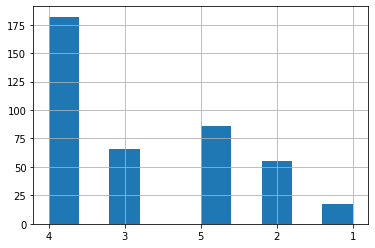

In [120]:
dfnew['temperament'].replace([])

In [122]:
#Wir kodieren temperamentvoll mit 1, unnd nicht temperamentvoll mit der 0 

temp_skala = {'1': 0, '2': 0, '3': 0, '4': 1,'5':1}

In [123]:
dfnew['temperament'] = dfnew['temperament'].apply(lambda x: temp_skala[x])

In [127]:
dfnew['laut'] = dfnew['laut'].astype(int)

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [134]:
x = dfnew['laut']
y = dfnew['temperament']

In [139]:
model = LogisticRegression( random_state=0)

In [147]:
model.fit(x.array.reshape(-1, 1), dfnew['temperament'].array)

LogisticRegression(random_state=0)

In [151]:
model.intercept_
model.coef_

array([-3.94181882])

In [153]:
performance = model.predict_proba(x.array.reshape(-1, 1))

In [154]:
model.score(x.array.reshape(-1, 1), dfnew['temperament'].array)

0.7364532019704434

In [168]:
dfnew['intercept'] = 1

In [169]:
# building the model and fitting the data 
log_reg = sm.Logit(dfnew[['temperament']],dfnew[['intercept','laut']]).fit() 

Optimization terminated successfully.
         Current function value: 0.530731
         Iterations 6


In [172]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:            temperament   No. Observations:                  406
Model:                          Logit   Df Residuals:                      404
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.1720
Time:                        20:05:23   Log-Likelihood:                -215.48
converged:                       True   LL-Null:                       -260.23
Covariance Type:            nonrobust   LLR p-value:                 3.045e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.0525      0.581     -6.976      0.000      -5.191      -2.914
laut           1.2793      0.158      8.116      0.000       0.970       1.588
